In [1]:
# Raw score are use when we do text summerieser
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 30.2 MB/s eta 0:00:00
   ━━━━

In [2]:
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric

In [3]:
from transformers import pipeline, set_seed
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer


In [4]:
import nltk
from nltk.tokenize import sent_tokenize

In [5]:
from tqdm import tqdm
import torch

In [6]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [9]:
device

'cuda'

In [10]:
model_ckpt = "google/pegasus-cnn_dailymail"

In [11]:

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
tokenizer

PegasusTokenizerFast(name_or_path='google/pegasus-cnn_dailymail', vocab_size=96103, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask_2>', 'additional_special_tokens': ['<mask_1>', '<unk_2>', '<unk_3>', '<unk_4>', '<unk_5>', '<unk_6>', '<unk_7>', '<unk_8>', '<unk_9>', '<unk_10>', '<unk_11>', '<unk_12>', '<unk_13>', '<unk_14>', '<unk_15>', '<unk_16>', '<unk_17>', '<unk_18>', '<unk_19>', '<unk_20>', '<unk_21>', '<unk_22>', '<unk_23>', '<unk_24>', '<unk_25>', '<unk_26>', '<unk_27>', '<unk_28>', '<unk_29>', '<unk_30>', '<unk_31>', '<unk_32>', '<unk_33>', '<unk_34>', '<unk_35>', '<unk_36>', '<unk_37>', '<unk_38>', '<unk_39>', '<unk_40>', '<unk_41>', '<unk_42>', '<unk_43>', '<unk_44>', '<unk_45>', '<unk_46>', '<unk_47>', '<unk_48>', '<unk_49>', '<unk_50>', '<unk_51>', '<unk_52>', '<unk_53>', '<unk_54>', '<unk_55>', '<unk_56>', '<unk_57>', '<unk_58>', '<unk_5

In [13]:
model_ckpt

'google/pegasus-cnn_dailymail'

In [14]:
model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)



pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [15]:
model_pegasus

PegasusForConditionalGeneration(
  (model): PegasusModel(
    (shared): Embedding(96103, 1024, padding_idx=0)
    (encoder): PegasusEncoder(
      (embed_tokens): Embedding(96103, 1024, padding_idx=0)
      (embed_positions): PegasusSinusoidalPositionalEmbedding(1024, 1024)
      (layers): ModuleList(
        (0-15): 16 x PegasusEncoderLayer(
          (self_attn): PegasusAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_no

In [16]:

from datasets import load_dataset


In [17]:
dataset_samsum=load_dataset("samsum")

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [18]:
dataset_samsum

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [19]:
split_lengths=[len(dataset_samsum[split])for split in dataset_samsum]
split_lengths

[14732, 819, 818]

In [20]:
dataset_samsum['train'].column_names

['id', 'dialogue', 'summary']

In [21]:

print(dataset_samsum["test"][4]["dialogue"])

print("\nSummary:")

print(dataset_samsum["test"][4]["summary"])

Ollie: Hi , are you in Warsaw
Jane: yes, just back! Btw are you free for diner the 19th?
Ollie: nope!
Jane: and the  18th?
Ollie: nope, we have this party and you must be there, remember?
Jane: oh right! i lost my calendar..  thanks for reminding me
Ollie: we have lunch this week?
Jane: with pleasure!
Ollie: friday?
Jane: ok
Jane: what do you mean " we don't have any more whisky!" lol..
Ollie: what!!!
Jane: you just call me and the all thing i heard was that sentence about whisky... what's wrong with you?
Ollie: oh oh... very strange! i have to be carefull may be there is some spy in my mobile! lol
Jane: dont' worry, we'll check on friday.
Ollie: don't forget to bring some sun with you
Jane: I can't wait to be in Morocco..
Ollie: enjoy and see you friday
Jane: sorry Ollie, i'm very busy, i won't have time for lunch  tomorrow, but may be at 6pm after my courses?this trip to Morocco was so nice, but time consuming!
Ollie: ok for tea!
Jane: I'm on my way..
Ollie: tea is ready, did you bri

In [22]:
print(dataset_samsum["test"][0]["dialogue"])

print("\nSummary:")

print(dataset_samsum["test"][0]["summary"])

Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


In [23]:
dataset_samsum['test'][0]['dialogue']

"Hannah: Hey, do you have Betty's number?\nAmanda: Lemme check\nHannah: <file_gif>\nAmanda: Sorry, can't find it.\nAmanda: Ask Larry\nAmanda: He called her last time we were at the park together\nHannah: I don't know him well\nHannah: <file_gif>\nAmanda: Don't be shy, he's very nice\nHannah: If you say so..\nHannah: I'd rather you texted him\nAmanda: Just text him 🙂\nHannah: Urgh.. Alright\nHannah: Bye\nAmanda: Bye bye"

In [24]:
# if before training first see your model output is good or not if not than train because the train the model is costaly

In [25]:
pipe = pipeline('summarization', model = model_ckpt )

pipe_out = pipe(dataset_samsum['test'][0]['dialogue'] )

print(pipe_out)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


[{'summary_text': "Amanda: Ask Larry Amanda: He called her last time we were at the park together .<n>Hannah: I'd rather you texted him .<n>Amanda: Just text him ."}]


In [26]:
print(pipe_out[0]['summary_text'].replace(" .<n>", ".\n"))

Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [27]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score


In [28]:
rouge_metric = load_metric('rouge')

score = calculate_metric_on_test_ds(dataset_samsum['test'], rouge_metric, model_pegasus, tokenizer, column_text = 'dialogue', column_summary='summary', batch_size=8)

<ipython-input-28-388971e09d3a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


100%|██████████| 103/103 [18:25<00:00, 10.73s/it]


In [29]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = ['pegasus'])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.015572,0.000306,0.015515,0.015543


Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 1024). Running this sequence through the model will result in indexing errors


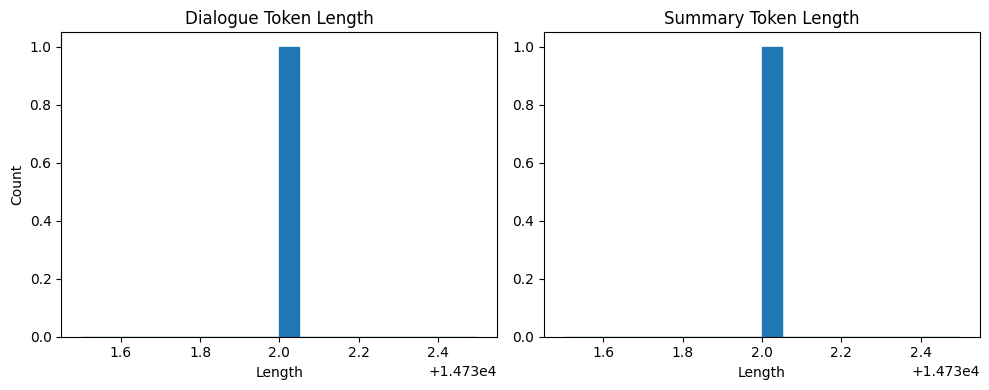

In [30]:
dialogue_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['dialogue']])

summary_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['summary']])


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [31]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch['dialogue'] , max_length = 1024, truncation = True )

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['summary'], max_length = 128, truncation = True )

    return {
        'input_ids' : input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [32]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:

%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [35]:
!mkdir texts_summarizers




In [36]:
%cd /content/drive/MyDrive/texts_summarizers/


/content/drive/MyDrive/texts_summarizers


In [37]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [38]:

trainer = Trainer(model=model_pegasus, args=trainer_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

In [39]:
trainer.train()

Step,Training Loss,Validation Loss
500,1.653300,1.487004


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}


TrainOutput(global_step=920, training_loss=1.8249299857927406, metrics={'train_runtime': 2743.2349, 'train_samples_per_second': 5.37, 'train_steps_per_second': 0.335, 'total_flos': 5528248038285312.0, 'train_loss': 1.8249299857927406, 'epoch': 0.9991854466467553})

In [40]:
score = calculate_metric_on_test_ds(
    dataset_samsum['test'], rouge_metric, trainer.model, tokenizer, batch_size = 2, column_text = 'dialogue', column_summary= 'summary'
)

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = [f'pegasus'] )

100%|██████████| 410/410 [13:31<00:00,  1.98s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.018663,0.000369,0.018535,0.018517


In [41]:
## Save model
model_pegasus.save_pretrained("pegasus-samsum-model")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}


In [42]:
pwd

'/content/drive/MyDrive/texts_summarizers'

In [43]:
ls

pegasus-samsum/  pegasus-samsum-model/


In [44]:
## Save tokenizer
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/spiece.model',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

#Test

In [45]:
dataset_samsum = load_dataset("samsum")

In [46]:
tokenizer = AutoTokenizer.from_pretrained("tokenizer")

In [47]:
sample_text = dataset_samsum["test"][0]["dialogue"]

reference = dataset_samsum["test"][0]["summary"]

In [48]:
sample_text

"Hannah: Hey, do you have Betty's number?\nAmanda: Lemme check\nHannah: <file_gif>\nAmanda: Sorry, can't find it.\nAmanda: Ask Larry\nAmanda: He called her last time we were at the park together\nHannah: I don't know him well\nHannah: <file_gif>\nAmanda: Don't be shy, he's very nice\nHannah: If you say so..\nHannah: I'd rather you texted him\nAmanda: Just text him 🙂\nHannah: Urgh.. Alright\nHannah: Bye\nAmanda: Bye bye"

In [49]:
reference

"Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry."

In [50]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}

pipe = pipeline("summarization", model="pegasus-samsum-model",tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [51]:
print("Dialogue:")
print(sample_text)


print("\nReference Summary:")
print(reference)


print("\nModel Summary:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Reference Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.

Model Summary:
Amanda can't find Betty's number. Larry called Betty last time they were at the park together. Hannah wants Amanda to text Larry. Amanda will text Larry.


In [52]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """Artificial intelligence has rapidly evolved over the past few decades, transforming various aspects of daily life and industry through advancements in machine learning,
natural language processing, and computer vision. The rise of AI technologies has enabled significant progress in fields such as healthcare, where predictive models are improving diagnostics and
treatment plans, and finance, where algorithms are enhancing fraud detection and trading strategies. However, this rapid development also brings challenges, including ethical concerns related to privacy,
 job displacement due to automation, and the need for regulatory frameworks to ensure responsible AI usage. As AI continues to advance, it is crucial for policymakers, technologists, and society at large to
 collaborate in addressing these issues and harnessing the potential of AI for the greater good"
"""  # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)

# Print the result
print("Input Text:\n", new_text)
print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Input Text:
 Artificial intelligence has rapidly evolved over the past few decades, transforming various aspects of daily life and industry through advancements in machine learning,
natural language processing, and computer vision. The rise of AI technologies has enabled significant progress in fields such as healthcare, where predictive models are improving diagnostics and
treatment plans, and finance, where algorithms are enhancing fraud detection and trading strategies. However, this rapid development also brings challenges, including ethical concerns related to privacy,
 job displacement due to automation, and the need for regulatory frameworks to ensure responsible AI usage. As AI continues to advance, it is crucial for policymakers, technologists, and society at large to
 collaborate in addressing these issues and harnessing the potential of AI for the greater good"


Generated Summary:
 Artificial intelligence has rapidly evolved over the past few decades, transforming various a

In [54]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """On a remote island in the South Pacific, where the azure waters meet the verdant jungles in a breathtaking panorama of untouched beauty, an ancient civilization once thrived,
 their advanced knowledge of astronomy and agriculture enabling them to build an intricate network of stone structures that aligned perfectly with celestial events. These monumental edifices,
 hidden beneath layers of lush vegetation, whisper secrets of a society that, centuries before the advent of modern technology, possessed an extraordinary understanding of the natural world,
 orchestrating their agricultural practices and social rituals in harmony with the cosmos. As archeologists painstakingly uncover these relics, revealing the complex artistry and engineering prowess of this lost culture,
 they are not only piecing together the historical puzzle of a vanished people but also gaining profound insights into the universal human quest to understand our place in the grand scheme of the universe, a quest that transcends time
 and geography"""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)

# Print the result
print("Input Text:\n", new_text)
print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Input Text:
 On a remote island in the South Pacific, where the azure waters meet the verdant jungles in a breathtaking panorama of untouched beauty, an ancient civilization once thrived,
 their advanced knowledge of astronomy and agriculture enabling them to build an intricate network of stone structures that aligned perfectly with celestial events. These monumental edifices,
 hidden beneath layers of lush vegetation, whisper secrets of a society that, centuries before the advent of modern technology, possessed an extraordinary understanding of the natural world,
 orchestrating their agricultural practices and social rituals in harmony with the cosmos. As archeologists painstakingly uncover these relics, revealing the complex artistry and engineering prowess of this lost culture,
 they are not only piecing together the historical puzzle of a vanished people but also gaining profound insights into the universal human quest to understand our place in the grand scheme of the universe, a 

In [57]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """In a quaint village nestled between rolling hills and dense forests, an old clockmaker named Tobias was known for his extraordinary
skill in crafting intricate timepieces. Each clock he made was a masterpiece, adorned with delicate engravings and mechanisms that seemed almost magical.
One day, a mysterious traveler arrived with an ancient, broken clock that had been in his family for generations. Tobias took on the challenge, and as he worked
meticulously to restore the clock, he discovered a hidden compartment containing a long-forgotten map. The map led to a hidden treasure buried deep within the forest,
 revealing a long-lost secret of the village. Tobias's discovery not only brought prosperity to the village but also renewed his sense of purpose, showing that sometimes,
 the most extraordinary adventures can start with the simplest of tasks."""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)

# Print the result

print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Generated Summary:
 In a quaint village, an old clockmaker named Tobias was known for his skill in crafting intricate timepieces. One day, a mysterious traveler arrived with an ancient, broken clock that had been in his family for generations. Tobias took on the challenge, and as he worked meticulously to restore the clock, he discovered a hidden compartment containing a long-forgotten map.


In [58]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """Abhishek: Hey everyone, I heard about a new art museum opening in the city this weekend. It sounds really interesting.

Sapna: Oh, that sounds exciting! I’ve been wanting to visit more art galleries lately. What kind of exhibits will they have?

Akansha: From what I read, they’re showcasing contemporary art and some interactive installations. It should be quite an experience.

Pradeep: That’s great! I love contemporary art. Maybe we can all go together and check it out.

Divyani: I’m in! It’s been a while since I visited a museum. It’ll be fun to explore and catch up with everyone.

Anjli: Count me in too. I’ve heard the museum’s architecture is also impressive. It’ll be nice to see both the art and the building itself.

Abhishek: Perfect! How about we plan for Saturday afternoon? We can meet for lunch first and then head to the museum.

Sapna: That works for me. Looking forward to it!

Akansha: Same here. It’s going to be a great outing.

Divyani: Agreed. Can’t wait to spend some quality time together and enjoy the new exhibits.

Anjli: Absolutely. See you all on Saturday!."""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 150}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)


print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Generated Summary:
 A new art museum is opening in the city this weekend. They're showcasing contemporary art and some interactive installations. They'll meet for lunch first and then head to the museum on Saturday afternoon.


In [59]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """Abhishek: Hey everyone, it’s been a while since we all caught up! How’s everything going?

Pradeep: Hey, Abhishek! Yeah, it feels like forever. I’ve been swamped with work lately. We should plan something fun.

Sapna: I was just thinking the same thing! We haven’t hung out in months. Maybe a weekend trip or a get-together at someone’s place?

Akanksha: A weekend trip sounds amazing. I’ve been itching to get out of the city for a bit. Maybe somewhere with nature, like a hiking trip?

Anjli: Hiking sounds like a great idea. There’s this beautiful place about 3 hours from here with scenic trails and a lake. We could spend the weekend there.

Abhishek: That sounds perfect! I could really use some fresh air and a break from work. What’s the name of the place, Anjli?

Anjli: It’s called Hillview Trails. I went there with family last year, and it’s super relaxing. We could rent a cabin by the lake and do some hiking during the day.

Pradeep: Hillview Trails, huh? I’m in. I need to burn off all the stress I’ve accumulated sitting at my desk all day. Plus, a cabin by the lake sounds pretty chill.

Sapna: I’m sold. Cabin life, nature, good company—what more could we ask for? Should we aim for the end of this month?

Akanksha: End of the month works for me! I’ll need to check if I can get Friday off, but it shouldn’t be a problem. What about everyone else?

Abhishek: I’m free at the end of the month. I’ll probably just need to make sure I wrap up a few things at work before then. What dates are we thinking? Maybe Friday to Sunday?

Anjli: Yeah, Friday to Sunday sounds ideal. We can leave early on Friday morning and come back Sunday evening. It’ll give us enough time to explore and relax without feeling rushed.

Pradeep: I’m good with that. Should we rent a car or take the train? I feel like the train would be fun, and we could chill during the ride.

Sapna: Ooh, the train sounds like a great idea. Plus, it’s more eco-friendly! And we don’t have to worry about driving.

Akanksha: I’m up for the train too. It’ll give us time to chat and plan out the weekend activities. What do we want to do once we get there?

Abhishek: Definitely hiking, maybe some kayaking if they have that by the lake. I wouldn’t mind just relaxing by the water with a good book either.

Anjli: They do have kayaking! And paddle boats too, if that’s more your speed. I’m down for hiking in the mornings and chilling by the lake in the afternoons.

Pradeep: I like the sound of that. Maybe we can do a barbecue by the cabin one night? I’ll bring my famous grilled chicken if you guys are interested.

Sapna: Yum, grilled chicken sounds amazing! We can do a mix—veggies, chicken, and maybe some seafood if we can grab some on the way. I’ll bring the sides and snacks.

Akanksha: I’ll take care of the drinks! I know this great place that sells local craft beers and juices. I’ll pick up a variety so we have something for everyone.

Abhishek: Perfect! So, it’s set then? Hillview Trails, last weekend of the month, Friday to Sunday, and we’ll take the train? I’ll look up train tickets and send options to the group.

Pradeep: Awesome! I’m really looking forward to this. It’ll be good to unwind and spend some time outdoors.

Sapna: Same here! It’s been way too long since we’ve done something like this. Can’t wait to catch up with you all.

Anjli: Agreed! I’ll start packing my hiking gear. Let’s make this weekend trip one to remember.

Akanksha: It’s going to be epic! I’ll keep you posted on the drinks and any updates from my end.

Abhishek: Alright, guys! I’ll check train times and book the cabin tonight. I’ll update you all tomorrow.

Pradeep: Sounds good! Let’s do this!

"""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 200}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)

print("Input Text:\n", new_text)
print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Input Text:
 Abhishek: Hey everyone, it’s been a while since we all caught up! How’s everything going?

Pradeep: Hey, Abhishek! Yeah, it feels like forever. I’ve been swamped with work lately. We should plan something fun.

Sapna: I was just thinking the same thing! We haven’t hung out in months. Maybe a weekend trip or a get-together at someone’s place?

Akanksha: A weekend trip sounds amazing. I’ve been itching to get out of the city for a bit. Maybe somewhere with nature, like a hiking trip?

Anjli: Hiking sounds like a great idea. There’s this beautiful place about 3 hours from here with scenic trails and a lake. We could spend the weekend there.

Abhishek: That sounds perfect! I could really use some fresh air and a break from work. What’s the name of the place, Anjli?

Anjli: It’s called Hillview Trails. I went there with family last year, and it’s super relaxing. We could rent a cabin by the lake and do some hiking during the day.

Pradeep: Hillview Trails, huh? I’m in. I need t

In [60]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """Abhishek: Hey everyone, it’s been a while since we all caught up! How’s everything going?

Pradeep: Hey, Abhishek! Yeah, it feels like forever. I’ve been swamped with work lately. We should plan something fun.

Sapna: I was just thinking the same thing! We haven’t hung out in months. Maybe a weekend trip or a get-together at someone’s place?

Akanksha: A weekend trip sounds amazing. I’ve been itching to get out of the city for a bit. Maybe somewhere with nature, like a hiking trip?

Anjli: Hiking sounds like a great idea. There’s this beautiful place about 3 hours from here with scenic trails and a lake. We could spend the weekend there.

Abhishek: That sounds perfect! I could really use some fresh air and a break from work. What’s the name of the place, Anjli?

Anjli: It’s called Hillview Trails. I went there with family last year, and it’s super relaxing. We could rent a cabin by the lake and do some hiking during the day.

Pradeep: Hillview Trails, huh? I’m in. I need to burn off all the stress I’ve accumulated sitting at my desk all day. Plus, a cabin by the lake sounds pretty chill.

Sapna: I’m sold. Cabin life, nature, good company—what more could we ask for? Should we aim for the end of this month?

Akanksha: End of the month works for me! I’ll need to check if I can get Friday off, but it shouldn’t be a problem. What about everyone else?

Abhishek: I’m free at the end of the month. I’ll probably just need to make sure I wrap up a few things at work before then. What dates are we thinking? Maybe Friday to Sunday?

Anjli: Yeah, Friday to Sunday sounds ideal. We can leave early on Friday morning and come back Sunday evening. It’ll give us enough time to explore and relax without feeling rushed.

Pradeep: I’m good with that. Should we rent a car or take the train? I feel like the train would be fun, and we could chill during the ride.

Sapna: Ooh, the train sounds like a great idea. Plus, it’s more eco-friendly! And we don’t have to worry about driving.

Akanksha: I’m up for the train too. It’ll give us time to chat and plan out the weekend activities. What do we want to do once we get there?

Abhishek: Definitely hiking, maybe some kayaking if they have that by the lake. I wouldn’t mind just relaxing by the water with a good book either.

Anjli: They do have kayaking! And paddle boats too, if that’s more your speed. I’m down for hiking in the mornings and chilling by the lake in the afternoons.

Pradeep: I like the sound of that. Maybe we can do a barbecue by the cabin one night? I’ll bring my famous grilled chicken if you guys are interested.

Sapna: Yum, grilled chicken sounds amazing! We can do a mix—veggies, chicken, and maybe some seafood if we can grab some on the way. I’ll bring the sides and snacks.

Akanksha: I’ll take care of the drinks! I know this great place that sells local craft beers and juices. I’ll pick up a variety so we have something for everyone.

Abhishek: Perfect! So, it’s set then? Hillview Trails, last weekend of the month, Friday to Sunday, and we’ll take the train? I’ll look up train tickets and send options to the group.

Pradeep: Awesome! I’m really looking forward to this. It’ll be good to unwind and spend some time outdoors.

Sapna: Same here! It’s been way too long since we’ve done something like this. Can’t wait to catch up with you all.

Anjli: Agreed! I’ll start packing my hiking gear. Let’s make this weekend trip one to remember.

Akanksha: It’s going to be epic! I’ll keep you posted on the drinks and any updates from my end.

Abhishek: Alright, guys! I’ll check train times and book the cabin tonight. I’ll update you all tomorrow.

Pradeep: Sounds good! Let’s do this!

"""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 1.2, "num_beams": 8, "max_length": 300}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)

print("Input Text:\n", new_text)
print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Input Text:
 Abhishek: Hey everyone, it’s been a while since we all caught up! How’s everything going?

Pradeep: Hey, Abhishek! Yeah, it feels like forever. I’ve been swamped with work lately. We should plan something fun.

Sapna: I was just thinking the same thing! We haven’t hung out in months. Maybe a weekend trip or a get-together at someone’s place?

Akanksha: A weekend trip sounds amazing. I’ve been itching to get out of the city for a bit. Maybe somewhere with nature, like a hiking trip?

Anjli: Hiking sounds like a great idea. There’s this beautiful place about 3 hours from here with scenic trails and a lake. We could spend the weekend there.

Abhishek: That sounds perfect! I could really use some fresh air and a break from work. What’s the name of the place, Anjli?

Anjli: It’s called Hillview Trails. I went there with family last year, and it’s super relaxing. We could rent a cabin by the lake and do some hiking during the day.

Pradeep: Hillview Trails, huh? I’m in. I need t

In [61]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Step 1: Load the fine-tuned model and tokenizer

tokenizer = AutoTokenizer.from_pretrained("tokenizer")  # Replace with your fine-tuned model path
model = AutoModelForSeq2SeqLM.from_pretrained("pegasus-samsum-model")  # Replace with your fine-tuned model path

# Step 2: Prepare new input text for summarization
new_text = """A long time ago, in a quiet village nestled at the edge of a vast forest, there was a legend passed down

 through generations. The villagers believed that deep within the forest, past the towering oaks and shimmering streams,

  lay a hidden realm where magic thrived. Few dared to venture far enough to find it, and those who did never returned. But young

   Elara had always been different. Ever since she was a child, she felt a pull toward the woods, as if something in its depths was calling her.

One crisp autumn morning, she made up her mind. Armed with nothing but a small bag of provisions and her unshakable curiosity,
\
Elara set off. The forest, though beautiful, grew darker the deeper she went. The trees stood taller, their leaves casting long

shadows on the forest floor. She walked for hours, her footsteps muffled by the thick moss that seemed to glow faintly underfoot.

 As evening fell, the light from the setting sun filtered through the branches, casting the forest in an eerie, golden hue.

Just as she considered turning back, she noticed something strange—a soft glow, like moonlight, but brighter. Following it,

 Elara came upon a clearing she had never heard of in the village tales. In the center of the clearing stood a grand tree,

  its bark silver and its leaves shimmering in every color of the rainbow. At its base was a pool of crystal-clear water that reflected the stars, even though the sky above was not yet dark.

Elara knelt by the pool and, without thinking, dipped her hand into the water. Instantly, she felt a warmth spread through her body, a warmth that seemed to fill her with energy and knowledge. As if in a dream, she saw visions—of people long forgotten, of creatures that could shape-shift at will, and of a time when the world was full of magic. She understood now why no one had returned. The forest did not take them; it transformed them. Those who entered the heart of the forest became part of its magic, its guardians.

Suddenly, the air around her shimmered, and from the shadows stepped creatures she had only heard about in myths. Tall beings with glowing eyes, their forms fluid and graceful, watched her with curiosity. They were the guardians, and now, so was she.

From that day forward, Elara was never seen again in the village. But on rare occasions, the villagers would speak of glimpsing a silver figure in the forest, moving gracefully between the trees. They no longer feared the forest, for they knew that one of their own had become its protector.

And so, the legend of the enchanted forest continued, passed from one generation to the next, though now with a different ending—one of wonder, transformation, and the power of the unknown.

"""
 # Replace with your input text

# Step 3: Use the pipeline for summarization
summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define generation arguments
gen_kwargs = {"length_penalty": 1.2, "num_beams": 8, "max_length": 300}

# Generate summary
summary = summarization_pipeline(new_text, **gen_kwargs)


print("\nGenerated Summary:\n", summary[0]['summary_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Generated Summary:
 Elara has always felt a pull toward the woods, as if something in its depths was calling her. One crisp autumn morning, she made up her mind and set off. Elara came upon a clearing she had never heard of in the village tales. In the center of the clearing stood a grand tree, its bark silver and its leaves shimmering in every color of the rainbow. At its base was a pool of crystal-clear water that reflected the stars, even though the sky above was not yet dark. Elara knelt by the pool and dipped her hand into the water. As if in a dream, she saw visions of people long forgotten, of creatures that could shape-shift at will, and of a time when the world was full of magic. The forest did not take them; it transformed them.
